In [1]:
import os
import keras
import numpy as np
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import EfficientNetB0

2025-04-27 06:10:13.806669: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745734214.058027      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745734214.132652      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 64
EPOCH = 25
LEARNING_RATE = 3e-4
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 100

train_ds_path = "/kaggle/input/sports-classification/train"
val_ds_path = "/kaggle/input/sports-classification/valid"
test_ds_path = "/kaggle/input/sports-classification/test"

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    train_ds_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
)

val_ds = keras.utils.image_dataset_from_directory(
    val_ds_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
)

test_ds = keras.utils.image_dataset_from_directory(
    test_ds_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
)

Found 13492 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [4]:
int2label = dict(enumerate(test_ds.class_names))

In [7]:
img_augmentation_layers = [
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip(),
    layers.RandomContrast(factor=0.1),
]

def img_augmentation(images):
    for layer in img_augmentation_layers:
        images = layer(images)
    return images

In [8]:
train_ds = train_ds.map(
    lambda img, label: (img_augmentation(img), label)
)

## Training a model from scratch

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.409987 to fit



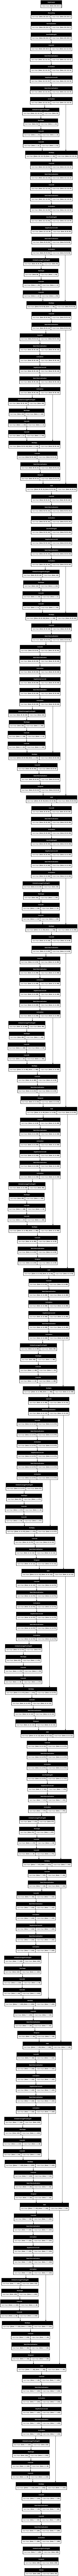

In [10]:
model = EfficientNetB0(
    include_top=True,
    weights=None,
    classes=NUM_CLASSES,
    input_shape=INPUT_SHAPE,
)

keras.utils.plot_model(model, show_shapes=True)



In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
epochs = 40  # @param {type: "slider", min:10, max:100}
hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/40


I0000 00:00:1745734996.047055      96 service.cc:148] XLA service 0x7df7fc0032d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745734996.049947      96 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745735001.070583      96 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1745735011.849298      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745735012.042684      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745735012.588227      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745735012.7969

210/211 ━━━━━━━━━━━━━━━━━━━━ 0s 874ms/step - accuracy: 0.0281 - loss: 4.6961

E0000 00:00:1745735228.717825      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745735228.911303      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745735229.436904      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745735229.647394      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745735230.032793      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

211/211 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.0283 - loss: 4.6932 - val_accuracy: 0.0180 - val_loss: 5.6935
Epoch 2/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 181s 855ms/step - accuracy: 0.0875 - loss: 3.8081 - val_accuracy: 0.0500 - val_loss: 4.1609
Epoch 3/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 181s 855ms/step - accuracy: 0.1420 - loss: 3.4291 - val_accuracy: 0.1120 - val_loss: 3.6086
Epoch 4/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 177s 839ms/step - accuracy: 0.1970 - loss: 3.1371 - val_accuracy: 0.1720 - val_loss: 3.3720
Epoch 5/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 181s 855ms/step - accuracy: 0.2513 - loss: 2.8929 - val_accuracy: 0.2620 - val_loss: 3.1016
Epoch 6/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 181s 855ms/step - accuracy: 0.3020 - loss: 2.6733 - val_accuracy: 0.2880 - val_loss: 2.9279
Epoch 7/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 180s 853ms/step - accuracy: 0.3337 - loss: 2.4984 - val_accuracy: 0.2560 - val_loss: 3.2294
Epoch 8/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 181s 855ms/step - accuracy: 0.3706 - loss: 2.3449 

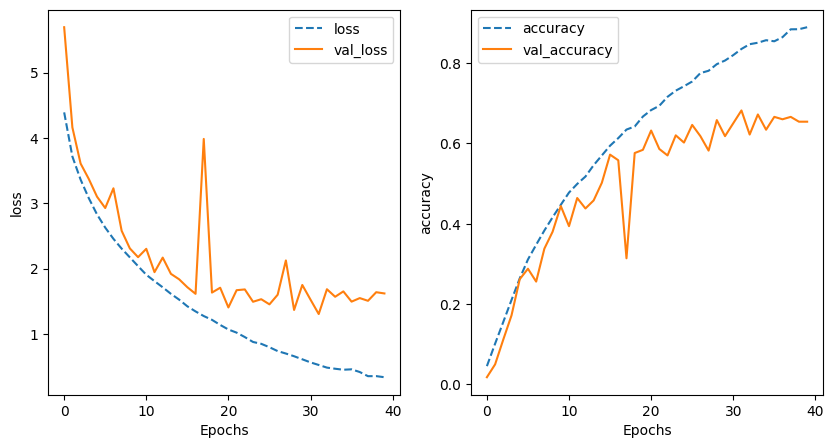

In [14]:
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed')
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_' + metric])
        ax[idx].legend([metric, 'val_' + metric])

training_plot(['loss', 'accuracy'], model.history)

In [23]:
# Get class names from the test dataset
class_names = test_ds.class_names

# Create lists to store true labels and predictions
y_true = []
y_pred = []

# Iterate through the test dataset
for images, labels in test_ds:
    # Get predictions
    predictions = model.predict(images, verbose=0)
    
    # Convert predictions to class indices
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Extend the lists with batch data
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(predicted_classes)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

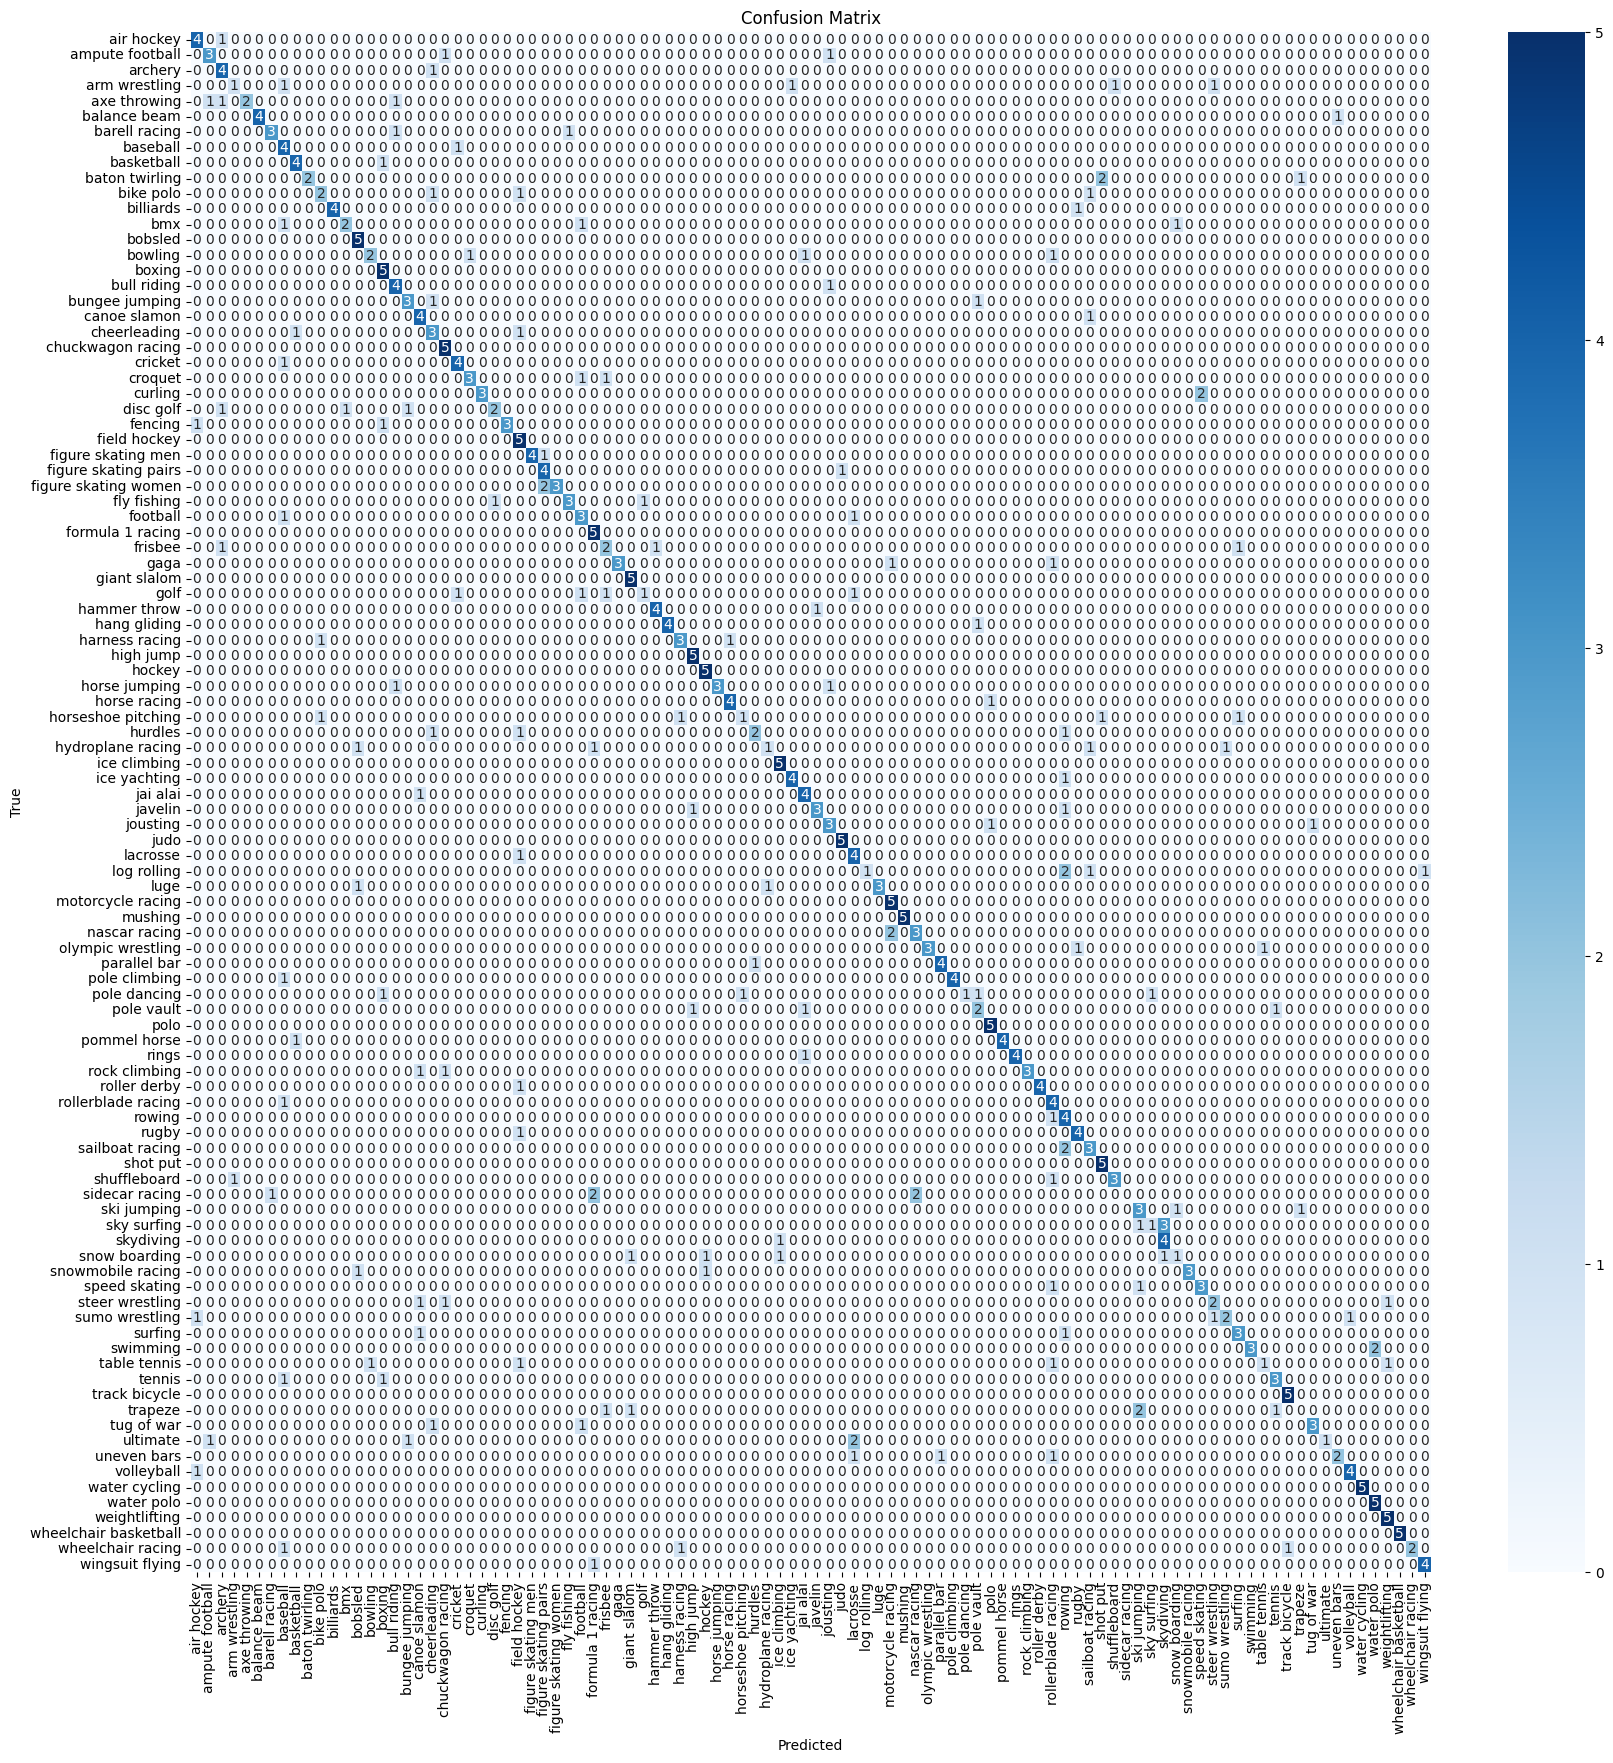

                       precision    recall  f1-score   support

           air hockey       0.57      0.80      0.67         5
      ampute football       0.60      0.60      0.60         5
              archery       0.50      0.80      0.62         5
        arm wrestling       0.50      0.20      0.29         5
         axe throwing       1.00      0.40      0.57         5
         balance beam       1.00      0.80      0.89         5
        barell racing       0.75      0.60      0.67         5
             baseball       0.33      0.80      0.47         5
           basketball       0.67      0.80      0.73         5
       baton twirling       1.00      0.40      0.57         5
            bike polo       0.50      0.40      0.44         5
            billiards       1.00      0.80      0.89         5
                  bmx       0.67      0.40      0.50         5
              bobsled       0.62      1.00      0.77         5
              bowling       0.67      0.40      0.50  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Plot confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))